### $$Session-12-Project-2$$

### Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.



### About the Dataset

The ultimate Soccer database for data analysis and
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

### Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating connection
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

### Feature Selection 

Given that we have about 35-40 different features to play around with, we attempt to run some feature selection algorithms to reduce the size of our featureset.

In [8]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [9]:
df_new = df.copy()

We see that most of our data are numeric, but there are a few objects and floating data types. In the subsequent prediction analysis we’ll only concern ourself with the integer numerics, but there is obviously potential gains to be made by incorporating the qualitative data (i.e. player position).

In [10]:
df_new = df_new.select_dtypes(["int64","float64"])

In [11]:
df_new.shape

(180354, 38)

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 38 columns):
id                    180354 non-null int64
player_fifa_api_id    180354 non-null int64
player_api_id         180354 non-null int64
overall_rating        180354 non-null float64
potential             180354 non-null float64
crossing              180354 non-null float64
finishing             180354 non-null float64
heading_accuracy      180354 non-null float64
short_passing         180354 non-null float64
volleys               180354 non-null float64
dribbling             180354 non-null float64
curve                 180354 non-null float64
free_kick_accuracy    180354 non-null float64
long_passing          180354 non-null float64
ball_control          180354 non-null float64
acceleration          180354 non-null float64
sprint_speed          180354 non-null float64
agility               180354 non-null float64
reactions             180354 non-null float64
balance              

In [13]:
X = df_new.drop('overall_rating',axis=1).values
y = df_new['overall_rating'].values.ravel()
X = scale(X)

In [14]:
df_1 = df_new.drop('overall_rating',axis=1)
df_1.head()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
X.shape

(180354, 37)

Feature Selection using RFE Scikit Library

In [16]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 7)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_api_id
potential
heading_accuracy
short_passing
ball_control
reactions
gk_diving


Using Statsmodel to illustrate the summary results

In [17]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 12)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_fifa_api_id
player_api_id
potential
heading_accuracy
short_passing
ball_control
reactions
strength
gk_diving
gk_handling
gk_kicking
gk_positioning


In [18]:
df_optm = df_new[features]

In [19]:
df_optm.shape

(180354, 12)

Using Statsmodels for analysing the impact of attribute potential on the player rating

In [20]:
import statsmodels.formula.api as sm
model1 = sm.OLS(df_new['overall_rating'],df_new['potential'])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.062e+07
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:            -5.3063e+05
No. Observations:              180354   AIC:                         1.061e+06
Df Residuals:                  180353   BIC:                         1.061e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
potential      0.9331      0.000   6373.716      0.0

Using Statsmodels for analysing the impact of all attribute on the player rating

In [21]:
X_new = df_new[features].values
model = sm.OLS(df_new['overall_rating'],df_new[features])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 9.822e+06
Date:                Sat, 09 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:31:43   Log-Likelihood:            -4.3483e+05
No. Observations:              180354   AIC:                         8.697e+05
Df Residuals:                  180342   BIC:                         8.698e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
player_fifa_api_id -7.359e-06   1.41

### Explanation of the OLS Regression Results :
    
*   <span style="color:blue">Adjusted R-squared</span> indicates that <span style="color:blue">99.8%</span> of player ratings can be explained by our predictor variable.
*  The <span style="color:blue">regression coefficient (coef)</span> represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. 
*  In our model, a one unit increase in potential increases the rating by <span style="color:blue">0.4794</span>.
*  The <span style="color:blue">standard error </span>measures the accuracy of potential's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. 
*  Our standard error,<span style="color:blue">0.001</span>, is low and therefore appears accurate.
*  The <span style="color:blue">p-value</span> means the probability of an <span style="color:blue">0.4794</span>  increasing in player rating due to a one unit increase in potential is <span style="color:blue">0%</span> , assuming there is no relationship between the two variables. 
*  A <span style="color:blue">low p-value</span> indicates that the results are statistically significant, that is in general the p-value is less than <span style="color:blue">0.05</span>.
*  The <span style="color:blue">confidence interval</span>  is a range within which our coefficient is likely to fall. We can be <span style="color:blue">95%</span> confident that potentials's coefficient will be within our confidence interval, <span style="color:blue">[0.450,0.455]</span>.

Warnings in the Summary provided by statsmodels OLS model

<span style="color:blue">Multicollinearity:</span> If we observe carefully, the warnings produced by our model regarding multicollinearity have two or more variables telling roughly the same story, overstating the value of each of the predictors.

### Regression Plots

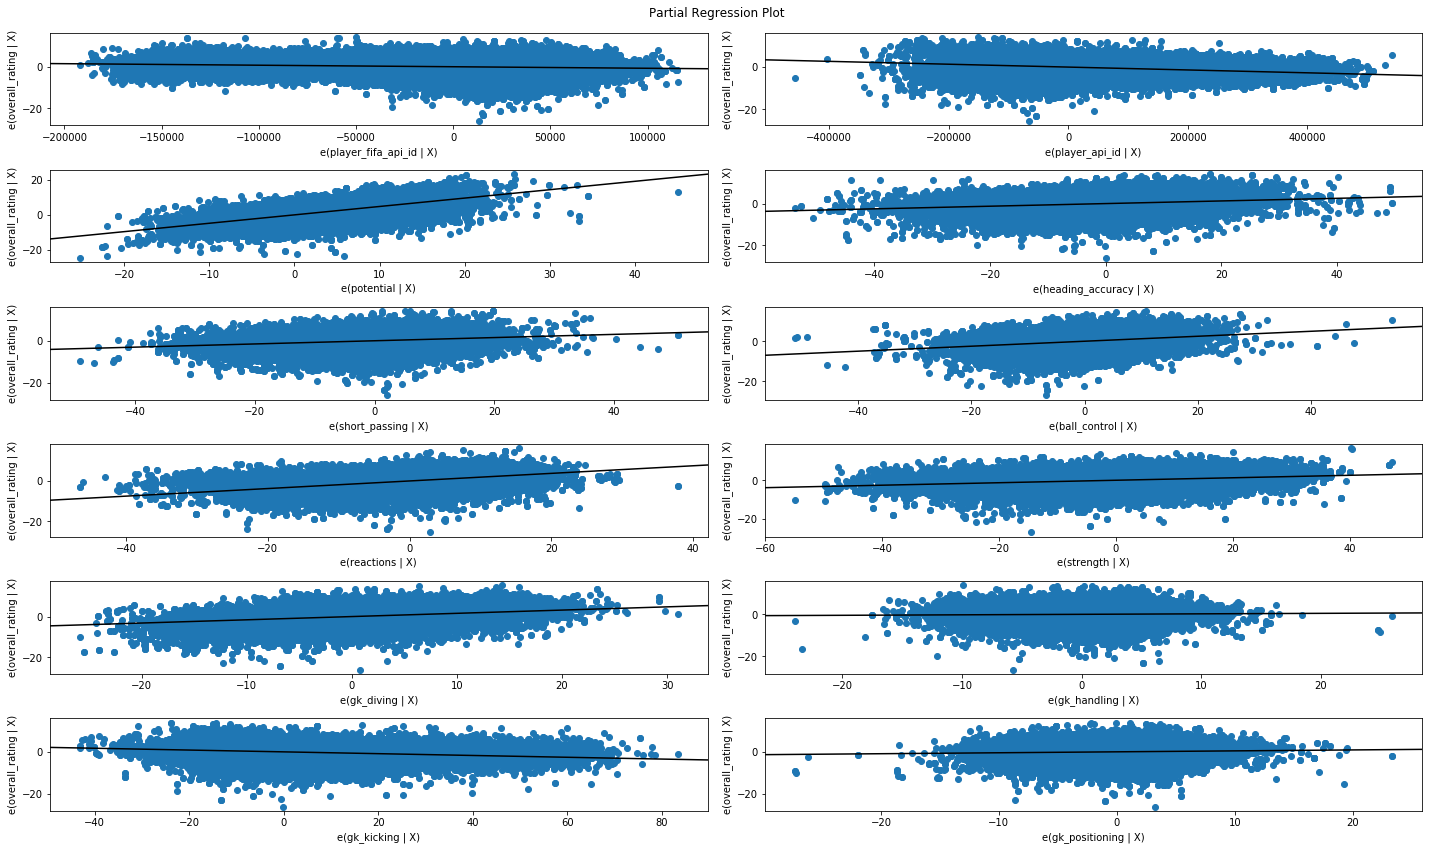

In [22]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [23]:
import statsmodels.formula.api as smf
# only include TV and Radio in the model
lm = smf.ols(formula='overall_rating ~  player_fifa_api_id + player_api_id +potential +heading_accuracy +short_passing +ball_control +acceleration +reactions +strength +marking +gk_diving +gk_handling +gk_kicking +gk_positioning +gk_reflexes ', data=df_new).fit()
print('Confidence of the statsmodel for the input data : ',lm.rsquared)

Confidence of the statsmodel for the input data :  0.8561047414083595


In [24]:
df_new.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [25]:
df_optm.head()

,player_fifa_api_id,player_api_id,potential,heading_accuracy,short_passing,ball_control,reactions,strength,gk_diving,gk_handling,gk_kicking,gk_positioning
0,218353,505942,71.0,71.0,61.0,49.0,47.0,76.0,6.0,11.0,10.0,8.0
1,218353,505942,71.0,71.0,61.0,49.0,47.0,76.0,6.0,11.0,10.0,8.0
2,218353,505942,66.0,71.0,61.0,49.0,47.0,76.0,6.0,11.0,10.0,8.0
3,218353,505942,65.0,70.0,60.0,48.0,46.0,76.0,5.0,10.0,9.0,7.0
4,218353,505942,65.0,70.0,60.0,48.0,46.0,76.0,5.0,10.0,9.0,7.0


### Data Exploration using visualization

In [26]:
df_corr = df_new.corr()

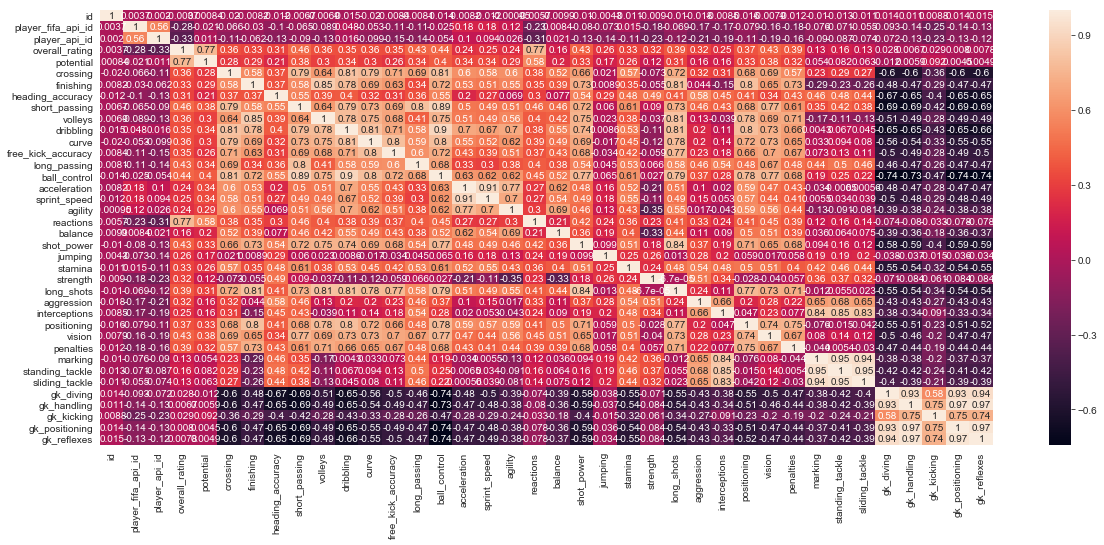

In [27]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True)

* The features contain high corelation .We need to remove them first before applying Regression Techniques.

In [28]:
#creating correlation matrix with absolute values
df_corr = df_new.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

['potential', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'long_shots', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_handling', 'gk_positioning', 'gk_reflexes']


In [29]:
#Drop Correlated Features
df_no_corr = df_new.drop(corr_features,axis=1)
df_no_corr.head()

,id,player_fifa_api_id,player_api_id,overall_rating,crossing,finishing,heading_accuracy,acceleration,balance,jumping,stamina,strength,aggression,interceptions,gk_diving,gk_kicking
0,1,218353,505942,67.0,49.0,44.0,71.0,60.0,65.0,58.0,54.0,76.0,71.0,70.0,6.0,10.0
1,2,218353,505942,67.0,49.0,44.0,71.0,60.0,65.0,58.0,54.0,76.0,71.0,70.0,6.0,10.0
2,3,218353,505942,62.0,49.0,44.0,71.0,60.0,65.0,58.0,54.0,76.0,63.0,41.0,6.0,10.0
3,4,218353,505942,61.0,48.0,43.0,70.0,60.0,65.0,58.0,54.0,76.0,62.0,40.0,5.0,9.0
4,5,218353,505942,61.0,48.0,43.0,70.0,60.0,65.0,58.0,54.0,76.0,62.0,40.0,5.0,9.0


In [30]:
len(df_no_corr.columns)

16

* This shows that the feature selection API - sklearn.feature_selection.RFE has resulted in the same feature selection for top 10 features selected.
* Quant Features against Rating

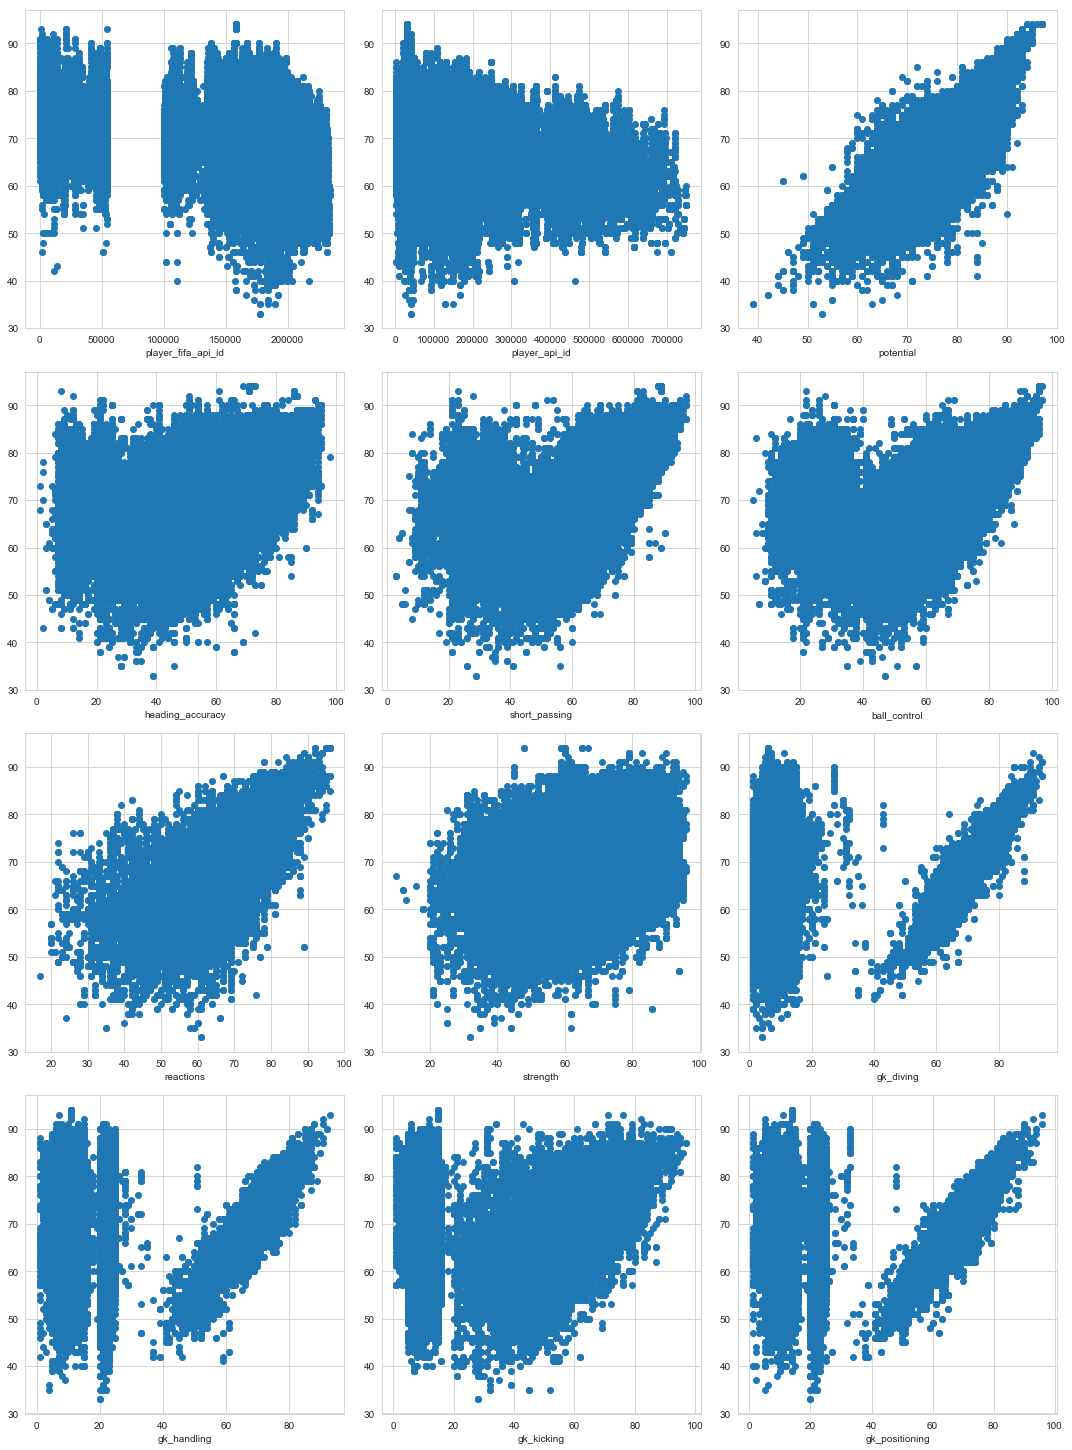

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,50))
val = df_optm.shape[1]
for idx in range(val):
    feature = df_optm.columns[idx]
    ax = fig.add_subplot(10,3,idx+1)
    Xtmp = df_optm[feature]
    ax.scatter(Xtmp, y)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

### Split the input data into training and test data

In [32]:
from sklearn.model_selection import train_test_split
#spliting 80% for train data and 20% for test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (144283, 37)
X_test Shape :  (36071, 37)
Y_train Shape :  (144283,)
Y_test.shape :  (36071,)


### Applying Linear Regression Model 

In [33]:
lm = LinearRegression()
lm.fit(X_train, Y_train)# train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Performing Prediction using Linear Regression Model 

In [34]:
Y_pred = lm.predict(X_test) # predict the prices based on the test data

In [35]:
Y_pred

array([73.73478412, 68.63428715, 67.21954541, ..., 63.93560911,
       65.78366138, 72.90645572])

In [36]:
print("The variance score of the LinearRegression model is  : ",lm.score(X_test,Y_test))

The variance score of the LinearRegression model is  :  0.859454992037456


* Since  variance score is near about 1 it seems to be a perfect prediction

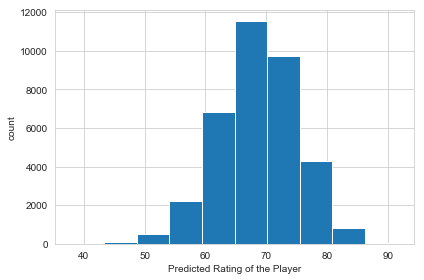

In [37]:
import matplotlib.pyplot as plt
plt.hist(Y_pred)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

Text(0.5,1,'Actual vs Predicted Rating for LinearRegression Model')

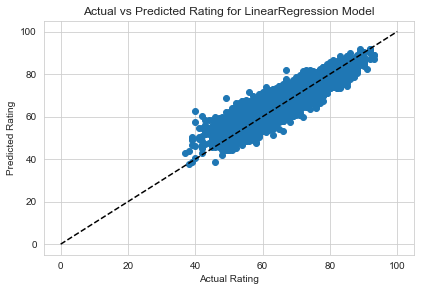

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
plt.scatter(Y_test, Y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for LinearRegression Model")

### Evaluating Linear Regression Accuracy using Root Mean Square Error 

In [39]:
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))

Error Rate of the Regression Model :  2.619517910471457


### Applying Decision Tree Regressor Model  to the input data

In [40]:
regressor  = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Performing Prediction using Decision Tree Regressor 


In [41]:
Y_pred = regressor.predict(X_test)

In [42]:
Y_pred

array([75., 72., 67., ..., 62., 67., 73.])

In [43]:
print("The variance score of the DecisionTreeRegressor model is  : ",regressor.score(X_test,Y_test))

The variance score of the DecisionTreeRegressor model is  :  0.960621239379357


* Since  variance score is near about 1 it seems to be a perfect prediction

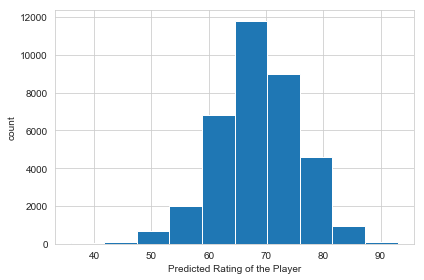

In [44]:
import matplotlib.pyplot as plt
plt.hist(Y_pred)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

Text(0.5,1,'Actual vs Predicted Rating for DecisionTreeRegressor Model')

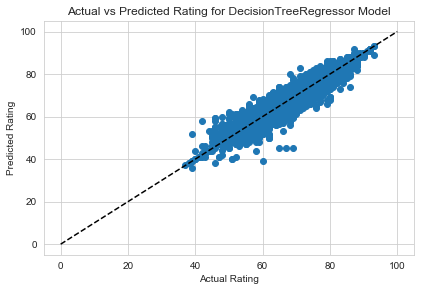

In [45]:
plt.scatter(Y_test, Y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for DecisionTreeRegressor Model")

In [46]:
#The mean of the expected target value in test set 
Y_test.mean()

68.65545729256189

In [47]:
#The mean of the predicted target value in test set 
Y_pred.mean()

68.6444695248624

### Evaluating Linear Regression Accuracy using Root Mean Square Error For DecisionTree Regressor model

In [48]:
print("Error Rate of the DecisionTreeRegressor Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))

Error Rate of the DecisionTreeRegressor Model :  1.3865792017962502


* The DecisionTreeRegressor Model performs better than the LinearRegression Model as eveident from the error rate

### Obtaining predictions by cross-validation for the Regression Models

In [49]:
df_optm = df_new.copy()
df_optm['rating'] = y
df_optm.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


In [50]:
from sklearn.model_selection import cross_val_predict
X = df_optm.drop('rating',axis=1)
Y = df_optm['rating']
predicted = cross_val_predict(regressor, X, Y, cv=10)

In [51]:
from sklearn.metrics import accuracy_score
print( "Accuracy Score of the DecisionTreeRegressor Model is  : " ,accuracy_score(Y.astype(int), predicted) )

Accuracy Score of the DecisionTreeRegressor Model is  :  0.9998003925612962


### Calculate Error using K-Fold Cross validation 

In [52]:
from sklearn.cross_validation import KFold
kfold = KFold(len(df_optm),n_folds=10,shuffle=True,random_state=0)

In [53]:
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
mean_abs_error = []
accuracy_score = []
for train,test in kfold:
    x = X.iloc[train]
    y = Y.iloc[train]
    lm.fit(x,y)
    Y_test = Y.iloc[test]
    Y_pred = lm.predict(X.iloc[test])
    mean_abs_error.append(mean_absolute_error(Y_test,Y_pred))
    print('10 Fold Cross Validation Error : {} accuracy score : {}  for LinearRegression Model '.format(np.mean(mean_abs_error),1 - np.mean(mean_abs_error)))

10 Fold Cross Validation Error : 1.1793296090065978e-11 accuracy score : 0.9999999999882067  for LinearRegression Model 
10 Fold Cross Validation Error : 6.5009428559168875e-12 accuracy score : 0.9999999999934991  for LinearRegression Model 
10 Fold Cross Validation Error : 4.865739478040436e-12 accuracy score : 0.9999999999951342  for LinearRegression Model 
10 Fold Cross Validation Error : 4.794476439528709e-12 accuracy score : 0.9999999999952055  for LinearRegression Model 
10 Fold Cross Validation Error : 4.0949244830187065e-12 accuracy score : 0.999999999995905  for LinearRegression Model 
10 Fold Cross Validation Error : 3.763394357241639e-12 accuracy score : 0.9999999999962366  for LinearRegression Model 
10 Fold Cross Validation Error : 3.5404961906614346e-12 accuracy score : 0.9999999999964595  for LinearRegression Model 
10 Fold Cross Validation Error : 3.238540419403955e-12 accuracy score : 0.9999999999967615  for LinearRegression Model 
10 Fold Cross Validation Error : 3.06

In [54]:
from sklearn.metrics import mean_absolute_error
#DR = LinearRegression()
mean_abs_error = []
accuracy_score = []
for train,test in kfold:
    x = X.iloc[train]
    y = Y.iloc[train]
    regressor.fit(x,y)
    Y_test = Y.iloc[test]
    Y_pred = regressor.predict(X.iloc[test])
    mean_abs_error.append(mean_absolute_error(Y_test,Y_pred))
    print('10 Fold Cross Validation Error : {} accuracy score : {}  for DecisionTreeRegressor Model '.format(np.mean(mean_abs_error),1 - np.mean(mean_abs_error)))

10 Fold Cross Validation Error : 0.0 accuracy score : 1.0  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 0.0 accuracy score : 1.0  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 0.0 accuracy score : 1.0  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 0.0 accuracy score : 1.0  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 2.2179096201829776e-05 accuracy score : 0.9999778209037982  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 1.848258016819148e-05 accuracy score : 0.9999815174198318  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 1.5842211572735553e-05 accuracy score : 0.9999841577884273  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 1.386193512614361e-05 accuracy score : 0.9999861380648739  for DecisionTreeRegressor Model 
10 Fold Cross Validation Error : 3.696516033638296e-05 accuracy score : 0.9999630348396636  for DecisionTreeRegressor Model 
10 Fo

### CONCLUSION :
    
We have used the below models to predict the player ratings:

*  statsmodels.api.OLS
*  LinearRegression
*  DecisionTreeRegressor

Sampling Mechanisms used:
    
* Test Train Split
* 10 Fold Cross Validation

Model Estimation mechanisms used:

* Root Mean Squared Error
* 10 Fold Cross Validation error